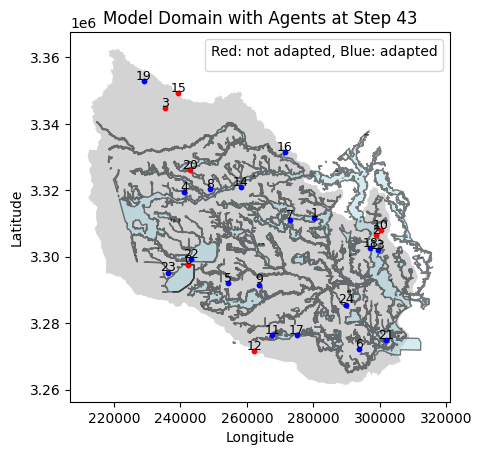

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx

model = AdaptationModel(seed=7, number_of_households=25, number_of_steps = 80, subsidies_package = 0, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

for step in range(model.number_of_steps):
    model.step()

    if step == model.flood_step:
        model.plot_model_domain_with_agents()
        break

In [2]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data.head(60)

,total_adapted_households
0,0
1,5
2,6
3,10
4,14
5,17
6,17
7,17
8,17
9,17


In [3]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data

FloodDepthEstimated  FloodDamageEstimated  HouseSize  \
Step AgentID                                                         
0    0                   2.193312         384969.007569        622   
     1                   5.005177         339118.325714        463   
     2                   2.219982          71987.759319        116   
     3                   0.000000              0.000000        207   
     4                   0.412621          46687.996296        120   
...                           ...                   ...        ...   
42   20                  0.000000              0.000000        339   
     21                  2.334229         151852.216455        242   
     22                  2.623753         182775.443682        284   
     23                  0.000000              0.000000        262   
     24                  0.000000              0.000000        219   

              FloodDepthActual  FloodDamageActual OptimalMeasure  \
Step AgentID                                                       
0    0                0.000000           0.000000           None   
     1                0.000000           0.000000           None   
     2                0.000000           0.000000           None   
     3                0.000000           0.000000           None   
     4                0.000000           0.000000           None   
...                        ...                ...            ...   
42   20               0.000000           0.000000           None   
     21               1.877212      144597.325277       Drains_0   
     22               1.654478      164757.588197       Drains_4   
     23               0.000000           0.000000       Drains_3   
     24               0.000000           0.000000       Drains_4   

                                             AdaptationMeasures  GoingToAdapt  \
Step AgentID                                                                    
0    0        {'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...         False   
     1        {'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...         False   
     2        {'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...         False   
     3        {'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...         False   
     4        {'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...         False   
...                                                         ...           ...   
42   20       {'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...         False   
     21       {'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...         False   
     22       {'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...         False   
     23       {'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...         False   
     24       {'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...         False   

              IsAdapted  CostOfAdaptation   IncomeLabel  Income  Savings  \
Step AgentID                                                               
0    0            False                 0          Rich   83945     0.00   
     1            False                 0          Rich   77460     0.00   
     2            False                 0          Poor    9006     0.00   
     3            False                 0  Middle-Class   19145     0.00   
     4            False                 0          Poor    3222     0.00   
...                 ...               ...           ...     ...      ...   
42   20           False                 0          Rich   91435     0.00   
     21            True              7260          Rich   93756  2115.60   
     22            True              8520  Middle-Class   25486  1037.25   
     23            True              7860  Middle-Class   29739  1061.70   
     24            True              6570  Middle-Class   19372   694.50   

              OwnFloodPerception  NetworkPerception  
Step AgentID                                         
0    0                         3                  0  
     1       

In [4]:
#Poor household that installs Drains going into step 5
result_df_xs = agent_data.xs(key=0, level='AgentID', axis=0, drop_level=False)

# Using .loc indexer
agent = agent_data.loc[(slice(None), 0), :]

agent

,,FloodDepthEstimated,FloodDamageEstimated,HouseSize,FloodDepthActual,FloodDamageActual,OptimalMeasure,AdaptationMeasures,GoingToAdapt,IsAdapted,CostOfAdaptation,IncomeLabel,Income,Savings,OwnFloodPerception,NetworkPerception
Step,AgentID,,,,,,,,,,,,,,,
0,0,2.193312,384969.007569,622,0.000000,0.000000,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Rich,83945,0.000,3,0
1,0,2.193312,384969.007569,622,0.000000,0.000000,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Rich,83945,0.000,1,1
2,0,2.193312,384969.007569,622,0.000000,0.000000,Heightening,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",True,False,0,Rich,83945,6295.875,3,3
3,0,2.193312,384969.007569,622,0.000000,0.000000,Heightening,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",True,False,0,Rich,83945,12591.750,3,3
4,0,2.193312,384969.007569,622,0.000000,0.000000,Heightening,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",True,False,0,Rich,83945,18887.625,3,3
5,0,2.193312,384969.007569,622,0.000000,0.000000,Heightening,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",True,False,0,Rich,83945,25183.500,3,3
6,0,2.193312,384969.007569,622,0.000000,0.000000,Heightening,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",True,False,0,Rich,83945,31479.375,3,3
7,0,2.193312,384969.007569,622,0.000000,0.000000,Heightening,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",True,False,0,Rich,83945,37775.250,3,3
8,0,2.193312,384969.007569,622,0.000000,0.000000,Heightening,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",True,False,0,Rich,83945,44071.125,3,3


In [5]:
#Poor household that installs Drains going into step 5
result_df_xs = agent_data.xs(key=2, level='AgentID', axis=0, drop_level=False)

# Using .loc indexer
agent = agent_data.loc[(slice(None), 2), :]

agent

,,FloodDepthEstimated,FloodDamageEstimated,HouseSize,FloodDepthActual,FloodDamageActual,OptimalMeasure,AdaptationMeasures,GoingToAdapt,IsAdapted,CostOfAdaptation,IncomeLabel,Income,Savings,OwnFloodPerception,NetworkPerception
Step,AgentID,,,,,,,,,,,,,,,
0,2,2.219982,71987.759319,116,0.000000,0.00000,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Poor,9006,0.00,1,0
1,2,2.219982,71987.759319,116,0.000000,0.00000,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Poor,9006,0.00,1,1
2,2,2.219982,71987.759319,116,0.000000,0.00000,Heightening,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",True,False,0,Poor,9006,675.45,3,3
3,2,2.219982,71987.759319,116,0.000000,0.00000,Heightening,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",True,False,0,Poor,9006,1350.90,3,3
4,2,2.219982,71987.759319,116,0.000000,0.00000,Heightening,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",True,False,0,Poor,9006,2026.35,3,3
5,2,2.219982,71987.759319,116,0.000000,0.00000,Heightening,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",True,False,0,Poor,9006,2701.80,3,3
6,2,2.219982,71987.759319,116,0.000000,0.00000,Heightening,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",True,False,0,Poor,9006,3377.25,3,3
7,2,2.219982,71987.759319,116,0.000000,0.00000,Heightening,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",True,False,0,Poor,9006,4052.70,3,3
8,2,2.219982,71987.759319,116,0.000000,0.00000,Heightening,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",True,False,0,Poor,9006,4728.15,3,3


In [6]:
#Middle-Class agent that installs Drains going into step 4
result_df_xs = agent_data.xs(key=15, level='AgentID', axis=0, drop_level=False)

# Using .loc indexer
agent = agent_data.loc[(slice(None), 15), :]

agent

,,FloodDepthEstimated,FloodDamageEstimated,HouseSize,FloodDepthActual,FloodDamageActual,OptimalMeasure,AdaptationMeasures,GoingToAdapt,IsAdapted,CostOfAdaptation,IncomeLabel,Income,Savings,OwnFloodPerception,NetworkPerception
Step,AgentID,,,,,,,,,,,,,,,
0,15,0.0,0.0,73,0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Poor,3644,0.0,2,0
1,15,0.0,0.0,73,0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Poor,3644,0.0,2,2
2,15,0.0,0.0,73,0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Poor,3644,0.0,3,3
3,15,0.0,0.0,73,0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Poor,3644,0.0,3,3
4,15,0.0,0.0,73,0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Poor,3644,0.0,3,3
5,15,0.0,0.0,73,0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Poor,3644,0.0,3,3
6,15,0.0,0.0,73,0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Poor,3644,0.0,3,3
7,15,0.0,0.0,73,0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Poor,3644,0.0,3,3
8,15,0.0,0.0,73,0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Poor,3644,0.0,3,3


In [7]:
#Rich household that installs Drains going into step 8
result_df_xs = agent_data.xs(key=20, level='AgentID', axis=0, drop_level=False)

# Using .loc indexer
agent = agent_data.loc[(slice(None), 20), :]

agent

,,FloodDepthEstimated,FloodDamageEstimated,HouseSize,FloodDepthActual,FloodDamageActual,OptimalMeasure,AdaptationMeasures,GoingToAdapt,IsAdapted,CostOfAdaptation,IncomeLabel,Income,Savings,OwnFloodPerception,NetworkPerception
Step,AgentID,,,,,,,,,,,,,,,
0,20,0.0,0.0,339,0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Rich,91435,0.0,3,0
1,20,0.0,0.0,339,0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Rich,91435,0.0,3,3
2,20,0.0,0.0,339,0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Rich,91435,0.0,3,3
3,20,0.0,0.0,339,0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Rich,91435,0.0,3,3
4,20,0.0,0.0,339,0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Rich,91435,0.0,3,3
5,20,0.0,0.0,339,0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Rich,91435,0.0,3,3
6,20,0.0,0.0,339,0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Rich,91435,0.0,3,3
7,20,0.0,0.0,339,0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Rich,91435,0.0,3,3
8,20,0.0,0.0,339,0.0,0.0,None,"{'Sandbags': [0.2, 5], 'Drains': [0.7, 30], 'H...",False,False,0,Rich,91435,0.0,3,3
